# Unit 5 - Financial Planning

In [198]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from alpaca_trade_api.rest import TimeFrame 
%matplotlib inline

In [199]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [200]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [201]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [202]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_content = btc_response.content
current_btc_price = btc_response.json()

# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_content = eth_response.content
current_eth_price = eth_response.json()

# Compute current value of my crpto
btc_price = current_btc_price["data"]["1"]["quotes"]["USD"]["price"]
eth_price = current_eth_price["data"]["1027"]["quotes"]["USD"]["price"]

my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $24021.60
The current value of your 5.3 ETH is $5803.39


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [203]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [204]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
# api = tradeapi.REST(api_version='v2')
load_dotenv()
api_key = os.getenv(ALPACA_API_KEY)
api_secret = os.getenv(ALPACA_SECRET_KEY)

base_url = 'https://paper-api.alpaca.markets'

api = tradeapi.REST(api_key, api_secret, base_url, api_version='v2')

account = api.get_account()





# Create the Alpaca API object
# YOUR CODE HERE!
spy_price = api.get_bars('SPY',  TimeFrame.Day)
spy_df = spy_price.df
agg_price = api.get_bars('AGG',  TimeFrame.Day)
agg_df = agg_price.df
print(agg_df)
print(spy_df)

                            open    high     low    close   volume  \
timestamp                                                            
2022-06-29 04:00:00+00:00  100.8  101.19  100.68  101.075  3529147   

                           trade_count       vwap  
timestamp                                          
2022-06-29 04:00:00+00:00        12662  101.04241  
                             open    high     low   close    volume  \
timestamp                                                             
2022-06-29 04:00:00+00:00  381.16  382.27  378.42  379.09  37610687   

                           trade_count        vwap  
timestamp                                           
2022-06-29 04:00:00+00:00       334542  380.344516  


In [205]:
# Format current date as ISO format


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!


# Reorganize the DataFrame
spy_df = spy_df.drop(columns=["open","high","low","volume","trade_count","vwap"])
agg_df= agg_df.drop(columns=["open","high","low","volume","trade_count","vwap"])
# Separate ticker data
spy_df.columns= ["SPY"]
agg_df.columns=["AGG"]
# Concatenate the ticker DataFrames
ticker_df = spy_df.join(agg_df)


# Preview DataFrame

#ticker_df.head()

In [206]:
# Pick AGG and SPY close prices
agg_close_price =ticker_df["AGG"][0] 
spy_close_price =ticker_df["SPY"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")
print(ticker_df)

Current AGG closing price: $101.075
Current SPY closing price: $379.09
                              SPY      AGG
timestamp                                 
2022-06-29 04:00:00+00:00  379.09  101.075


In [207]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18954.50
The current value of your 200 AGG shares is $75818.00


### Savings Health Analysis

In [208]:
# Set monthly household income
monthly_income = 12000
total_crypto_savings = my_btc_value + my_eth_value 
total_stock_savings = my_spy_value + my_agg_value
# Consolidate financial assets data
savings = [total_crypto_savings, total_stock_savings]
index = ["Crypto", "Shares"]
df_savings = pd.DataFrame(savings,index)
df_savings.columns= [ "Savings"]
# Create savings DataFrame
print(df_savings)

# Display savings DataFrame
# display(df_savings)

          Savings
Crypto  29824.994
Shares  94772.500


<AxesSubplot:title={'center':'Total Savings'}, ylabel='Savings'>

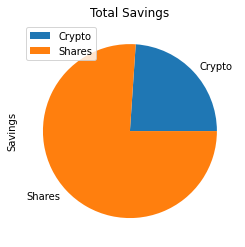

In [209]:
# Plot savings pie chart
df_savings.plot(kind="pie", y = "Savings", title= "Total Savings")

In [210]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto_savings + total_stock_savings
# Validate saving health
if total_savings < emergency_fund:
    print(" message showing how many dollars away the person is from reaching the goal")
elif total_savings > emergency_fund:
    print("display a message congratulating the person for having enough money in this fund")
else:
    print("display a message congratulating the person on reaching this financial goal")

display a message congratulating the person for having enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [211]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [212]:
# Get 5 years' worth of historical data for SPY and AGG
# spy_get_5_years = api.get_bars('SPY',  TimeFrame.Day, start_date, end_date)
# spy_5years_df = spy_get_5_years.df
# agg_get_5_years = api.get_bars('AGG', TimeFrame.Day, start_date, end_date)
# agg_5years_df = agg_get_5_years.df
df_ticker=api.get_bars(tickers,timeframe,start=start_date,end=end_date).df

# Reorganize the DataFrame
# Separate ticker data
# spy_5years_df = spy_5years_df.drop(columns=["open","high","low","volume","trade_count","vwap"],axis=1)
# agg_5years_df = agg_5years_df.drop(columns=["open","high","low","volume","trade_count","vwap"],axis=1)

AGG = df_ticker[df_ticker["symbol"]=='AGG'].drop("symbol", axis=1)
SPY = df_ticker[df_ticker["symbol"]=='SPY'].drop("symbol", axis=1)

# spy_5years_df.columns= ["SPY"]
# agg_5years_df.columns= ["AGG"]
# Concatenate the ticker DataFrames
# df_stock_data = pd.concat([spy_5years_df,agg_5years_df],axis=1)     #spy_5years_df.join(agg_5years_df).reset_index()
df_ticker = pd.concat([AGG,SPY], axis=1,keys=["AGG","SPY"])

# Display sample data



df_ticker.head()

# df_stock_data.columns = df_stock_data.columns.droplevel(2)

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [213]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

#my_agg = 200
#my_spy = 50
MC_30years= MCSimulation(portfolio_data = df_ticker, weights= [.20,.80],
                         num_simulation= 500,num_trading_days = 252*30)



In [214]:
# Printing the simulation input data
MC_30years.portfolio_data.tail()

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2021-04-26 04:00:00+00:00  114.74  114.8015  114.65  114.65  3480337   
2021-04-27 04:00:00+00:00  114.60  115.1300  114.37  114.37  3820640   
2021-04-28 04:00:00+00:00  114.45  114.4685  114.20  114.43  7075831   
2021-04-29 04:00:00+00:00  114.14  114.3700  114.09  114.37  6208142   
2021-04-30 04:00:00+00:00  114.41  114.5150  114.33  114.49  6469432   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2021-04-26 04:00:00+00:00       13521  114.706244    -0.000871  417.42   
2021-04-27 04:00:00+00:00       12720  114.498315    -0.002442  417.97   
2021-04-28 04:00:00+00:00       24303  114.379810     0.000525  417.84   
2021-04-29 04:00:00+00:00       21096  114.250702    -0.000524  420.38   
2021-04-30 04:00:00+00:00       19582  114.456246     0.001049  417.67   

                                                                           \
                             high       low   close    volume trade_count   
timestamp                                                                   
2021-04-26 04:00:00+00:00  418.22  416.8111  417.61  52076360      295872   
2021-04-27 04:00:00+00:00  418.14  416.3000  417.52  50324187      296302   
2021-04-28 04:00:00+00:00  419.01  416.9000  417.40  50692843      330050   
2021-04-29 04:00:00+00:00  420.72  416.4400  420.06  77056617      443399   
2021-04-30 04:00:00+00:00  418.54  416.3400  417.30  84731942      478844   

                                                    
                                 vwap daily_return  
timestamp                                           
2021-04-26 04:00:00+00:00  417.505200     0.002088  
2021-04-27 04:00:00+00:00  417.481280    -0.000216  
2021-04-28 04:00:00+00:00  417.742098    -0.000287  
2021-04-29 04:00:00+00:00  418.825111     0.006373  
2021-04-30 04:00:00+00:00  417.651995    -0.006570

In [215]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Admin\Desktop\Module 5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993615,1.007130,0.986302,0.989901,0.999555,0.989152,0.984671,1.000952,1.012908,1.021088,...,1.003382,1.005519,1.007302,1.001887,0.993596,0.999102,1.007965,1.009639,1.021532,1.004942
2,0.998234,1.004823,0.991809,0.996433,1.012698,0.991080,0.978448,0.999923,1.012326,1.018338,...,1.005601,1.017086,0.994874,0.998262,0.982157,1.005044,1.021992,1.007160,1.012476,1.007010
3,0.986871,1.003247,0.990809,0.994271,0.987329,0.994175,0.975771,1.002168,1.006549,1.031061,...,1.011687,1.014411,1.010125,0.995500,0.985331,1.010391,1.010310,0.996328,1.014200,1.009639
4,0.972289,1.006305,0.988507,0.988989,0.985484,0.986781,0.988522,0.993723,0.997173,1.041629,...,1.017942,1.011318,1.016498,0.996519,0.996630,1.014252,1.004441,1.005304,1.009342,1.016337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,39.298410,40.895153,80.626353,29.313729,17.972136,33.892769,5.780516,48.050197,14.796378,9.552076,...,26.536194,36.916581,48.975570,30.300725,58.403969,15.501505,26.616165,58.959947,69.994035,58.405706
7557,38.875765,40.630298,80.576768,29.663462,17.853314,34.053969,5.747051,48.207393,14.937100,9.476970,...,26.827301,37.047711,49.675217,30.657960,59.164501,15.290844,26.475688,58.813758,70.575335,59.057400
7558,39.081850,40.986350,80.478105,29.835729,17.761480,34.983728,5.746635,48.832374,15.064669,9.463057,...,27.214263,37.630772,49.695182,30.279908,58.528028,15.244038,26.464707,58.950083,71.369322,59.466447
7559,39.511194,40.818353,80.071071,30.369713,17.622086,34.774102,5.788352,48.374025,15.205426,9.659642,...,26.747729,37.441201,50.685975,30.137053,58.124142,15.172523,26.227798,59.584523,71.553199,58.515414


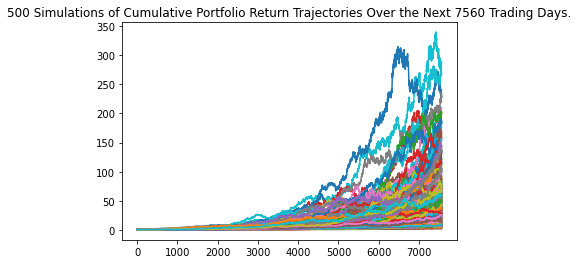

In [216]:
# Plot simulation outcomes
MC_30year_plot = MC_30years.plot_simulation()
MC_30year_plot.get_figure().savefig("MC_30year_sim_plot.png", bbox_inches="tight")

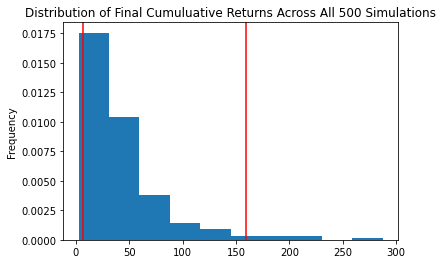

In [217]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30years.plot_distribution()
dist_plot.get_figure().savefig("MC_30year_dist_plot.png",bbox_inches="tight")

### Retirement Analysis

In [218]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30years.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             42.801407
std              39.972351
min               2.578294
25%              16.955939
50%              31.054293
75%              54.766901
max             287.559067
95% CI Lower      6.283163
95% CI Upper    159.417296
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [219]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $125663.27 and $3188345.92


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [220]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $188494.9 and $4782518.88


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [221]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
start_date_5year = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date_5year = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()
df_ticker_5year=api.get_bars(tickers,timeframe,start=start_date_5year,end=end_date_5year).df
AGG_5year = df_ticker_5year[df_ticker_5year["symbol"]=='AGG'].drop("symbol", axis=1)
SPY_5year = df_ticker_5year[df_ticker_5year["symbol"]=='SPY'].drop("symbol", axis=1)
df_ticker_5year = pd.concat([AGG,SPY], axis=1,keys=["AGG","SPY"])
MC_5years= MCSimulation(portfolio_data = df_ticker, weights= [.20,.80],
                         num_simulation= 500,num_trading_days = 252*5)

In [222]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Admin\Desktop\Module 5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995351,0.991201,0.995663,1.002187,1.008369,1.002372,0.995862,0.987490,0.992721,0.990798,...,1.001233,1.002887,0.985041,0.990773,0.999200,1.000316,0.986133,1.017554,1.004397,1.019982
2,0.999254,0.983173,0.981854,1.019356,1.015999,1.018249,1.008909,0.991205,0.985589,0.991258,...,0.986242,1.011892,0.980681,0.997192,0.984268,1.002111,0.998371,1.021081,0.990564,1.021586
3,1.004464,0.980617,0.982316,1.021922,1.020155,1.012630,1.014168,0.986056,0.980802,1.012891,...,1.024232,1.016670,0.980882,1.009845,0.969893,0.997615,0.998690,1.029467,0.968283,1.013856
4,1.004403,0.992674,0.991322,1.032324,1.009987,1.016896,1.016811,0.976370,0.983906,1.019173,...,1.031532,1.013966,0.964485,1.010893,0.984359,0.999503,1.012258,1.010062,0.965815,0.997232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.679277,1.415885,2.182854,1.510096,1.775144,2.055550,1.834870,2.436917,1.588791,1.730353,...,1.658930,1.082351,1.474852,2.495286,1.266232,1.882837,1.255582,1.118783,3.536954,2.318168
1257,1.689216,1.405192,2.200378,1.507112,1.756452,2.033473,1.816880,2.420855,1.637455,1.721286,...,1.656771,1.085280,1.462842,2.465295,1.262424,1.892949,1.235617,1.130570,3.550531,2.337310
1258,1.673873,1.408988,2.193879,1.485523,1.736004,2.024126,1.829313,2.409056,1.627885,1.719228,...,1.677220,1.084974,1.484722,2.438764,1.251269,1.873066,1.237329,1.143671,3.561748,2.389930
1259,1.685588,1.405322,2.235178,1.489748,1.738124,2.015886,1.829372,2.412779,1.631423,1.751608,...,1.662294,1.066990,1.491689,2.483841,1.261865,1.882669,1.222215,1.131037,3.503198,2.400919


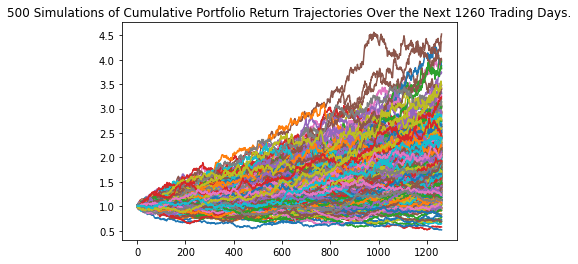

In [223]:
# Plot simulation outcomes
MC_5year_plot = MC_5years.plot_simulation()
MC_5year_plot.get_figure().savefig("MC_5year_sim_plot.png", bbox_inches="tight")

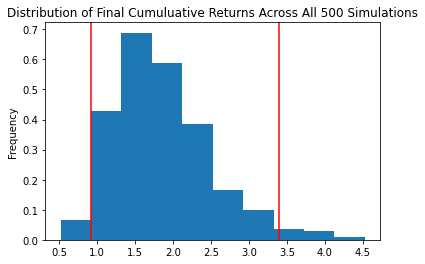

In [224]:
# Plot probability distribution and confidence intervals
dist_plot_5year = MC_5years.plot_distribution()
dist_plot_5year.get_figure().savefig("MC_5year_dist_plot.png",bbox_inches="tight")

In [225]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5year = MC_30years.summarize_cumulative_return()

# Print summary statistics
print(tbl_5year)

count           500.000000
mean             42.801407
std              39.972351
min               2.578294
25%              16.955939
50%              31.054293
75%              54.766901
max             287.559067
95% CI Lower      6.283163
95% CI Upper    159.417296
Name: 7560, dtype: float64


In [226]:
# Set initial investment
initial_investment = 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 5 years will end within in the range of $188494.9 and $4782518.88


### Ten Years Retirement Option

In [227]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()
df_ticker=api.get_bars(tickers,timeframe,start=start_date,end=end_date).df
AGG = df_ticker[df_ticker["symbol"]=='AGG'].drop("symbol", axis=1)
SPY = df_ticker[df_ticker["symbol"]=='SPY'].drop("symbol", axis=1)
df_ticker = pd.concat([AGG,SPY], axis=1,keys=["AGG","SPY"])
MC_10years= MCSimulation(portfolio_data = df_ticker, weights= [.20,.80],
                         num_simulation= 500,num_trading_days = 252*10)

In [228]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Admin\Desktop\Module 5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997772,1.010341,1.003942,0.986524,0.995379,0.998038,1.000058,0.994344,0.996683,0.999511,...,0.998563,0.990697,1.008851,1.001512,1.014114,1.003068,0.984127,1.001221,1.002151,0.997880
2,0.992962,1.006291,0.998799,0.975221,0.991556,1.001549,0.993679,0.988805,0.988615,1.000667,...,1.010713,0.989781,1.013118,1.000404,1.029401,1.011263,0.979076,1.012630,1.001834,1.005737
3,1.012374,1.006951,0.999492,0.984577,1.005858,0.995469,0.991327,0.978668,0.977279,1.004321,...,1.013886,1.001038,1.007816,0.990176,1.023230,1.002715,0.982312,0.998200,0.997289,1.006502
4,1.010118,1.002089,1.012525,0.986874,0.996992,0.982691,0.989627,0.981398,0.976670,1.009133,...,1.014568,1.000831,1.010905,0.997393,1.026819,0.988787,0.969980,1.003610,0.991155,1.009822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,6.797568,3.186785,1.382230,4.488030,2.296716,0.920639,2.744731,4.045642,1.646947,2.475360,...,1.686254,3.235613,4.029430,3.803383,3.641369,3.913089,3.064105,12.854749,2.603689,1.699298
2517,6.774063,3.213815,1.414851,4.473262,2.317738,0.915347,2.773960,4.035954,1.673720,2.459832,...,1.691604,3.219865,4.080062,3.773779,3.644581,3.938958,3.099996,12.916153,2.636420,1.659674
2518,6.666049,3.207519,1.410848,4.535853,2.300462,0.907754,2.748909,4.001256,1.657745,2.492389,...,1.688182,3.226020,4.056284,3.761624,3.682654,3.971184,3.111051,12.991794,2.583488,1.672632
2519,6.614429,3.216185,1.415659,4.540316,2.310643,0.898929,2.707122,4.024570,1.639134,2.500003,...,1.694232,3.248335,4.078184,3.732910,3.704127,4.001004,3.120210,12.757296,2.574330,1.668542


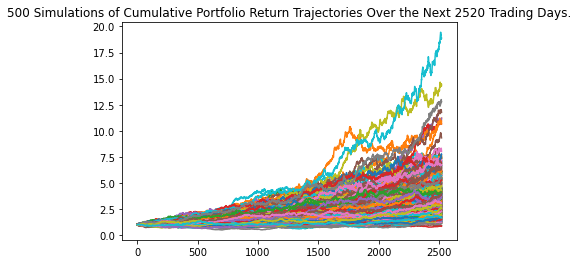

In [229]:
# Plot simulation outcomes
MC_10year_plot = MC_10years.plot_simulation()
MC_10year_plot.get_figure().savefig("MC_10year_sim_plot.png", bbox_inches="tight")

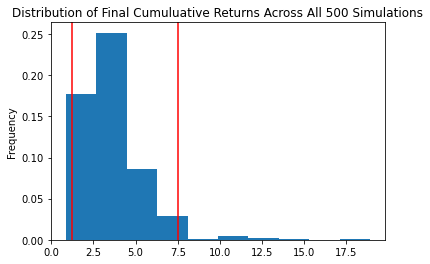

In [230]:
# Plot probability distribution and confidence intervals
dist_plot_10year = MC_10years.plot_distribution()
dist_plot_10year.get_figure().savefig("MC_10year_dist_plot.png",bbox_inches="tight")

In [233]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10year = MC_10years.summarize_cumulative_return()

# Print summary statistics
print(tbl_10year)

count           500.000000
mean              3.607676
std               1.916434
min               0.861197
25%               2.366037
50%               3.253274
75%               4.349234
max              18.902605
95% CI Lower      1.257928
95% CI Upper      7.507858
Name: 2520, dtype: float64


In [234]:
# Set initial investment
initital_investment = 35000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 10 years will end within in the range of $188494.9 and $4782518.88
